In [60]:
! cp RTE_Frequence_2022_11.txt /Users/skostogl/Documents/workspace/ADTobsbox/nxcals_martin

In [45]:
import pandas as pd

file_path = 'RTE_Frequence_2022_11.txt'
df = pd.read_csv(file_path, encoding='ISO-8859-1', skiprows=[0], delimiter=';', parse_dates=[0], decimal=',')
df = df.drop([len(df)-1])
df['DATE'] = df.apply(lambda x: pd.to_datetime(str(x['DATE']), format='%d/%m/%Y %H:%M:%S').tz_localize('CET'), axis=1)
df['FREQUENCE_RETENUE(EN Hz)']=df['FREQUENCE_RETENUE(EN Hz)'].astype(float)

In [54]:
t1 = pd.Timestamp("2022-11-05 20:10:04.433965+00:00", tz='UTC')
t2 = pd.Timestamp("2022-11-05 20:49:59.655837+00:00", tz='UTC')

df_int = df[(df['DATE']>=t1) & (df['DATE']<=t2)]

In [55]:
df_int

,DATE,FREQUENCE_RETENUE(EN Hz),Unnamed: 2
42181,2022-11-05 21:10:10+01:00,49.9724,NaN
42182,2022-11-05 21:10:20+01:00,49.9708,NaN
42183,2022-11-05 21:10:30+01:00,49.9673,NaN
42184,2022-11-05 21:10:40+01:00,49.9633,NaN
42185,2022-11-05 21:10:50+01:00,49.9661,NaN
...,...,...,...
42415,2022-11-05 21:49:10+01:00,50.0289,NaN
42416,2022-11-05 21:49:20+01:00,50.0422,NaN
42417,2022-11-05 21:49:30+01:00,50.0479,NaN
42418,2022-11-05 21:49:40+01:00,50.0413,NaN


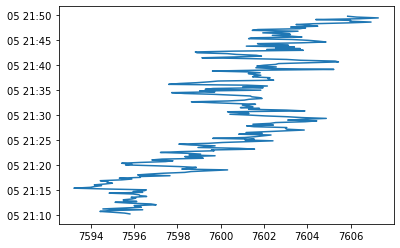

In [59]:
import matplotlib.pyplot as plt
myf = 7600
k = myf/50.
plt.plot( (df_int['FREQUENCE_RETENUE(EN Hz)']-50.0)*k + myf, df_int['DATE'])